In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


Text(0.5, 1.0, 'center')

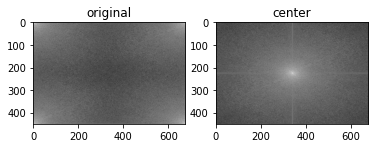

In [ ]:
# FFT Transform
img = cv2.imread('flower.jpg', 0) 
f = np.fft.fft2(img) 
fshift = np.fft.fftshift(f) 

# abs processing can change plural to real number
# log processing can restrict the range 
s1 = np.log(np.abs(f))
s2 = np.log(np.abs(fshift))
plt.subplot(121)
plt.imshow(s1, 'gray')
plt.title('original')
plt.subplot(122)
plt.imshow(s2, 'gray')
plt.title('center')


Text(0.5, 1.0, 'center')

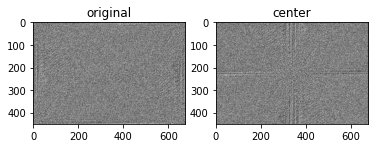

In [ ]:
# The complex phase
img = cv2.imread('flower.jpg', 0) 
f = np.fft.fft2(img) 
fshift = np.fft.fftshift(f) 

# Numpy has a function angle calculating the angle
ph_f = np.angle(f)
ph_fshift = np.angle(fshift)

plt.subplot(121)
plt.imshow(ph_f, 'gray')
plt.title('original')
plt.subplot(122)
plt.imshow(ph_fshift, 'gray')
plt.title('center')


Text(0.5, 1.0, 'img back')

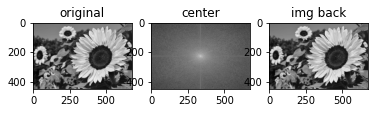

In [ ]:
# Inverse transform
img = cv2.imread('flower.jpg', 0) 
f = np.fft.fft2(img) 
fshift = np.fft.fftshift(f) 

s1 = np.log(np.abs(fshift))
plt.subplot(131)
plt.imshow(img, 'gray')
plt.title('original')
plt.subplot(132)
plt.imshow(s1,'gray')
plt.title('center')

# Inverse transform
f1shift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f1shift)
# img_back is a complex number
img_back = np.abs(img_back)
plt.subplot(133)
plt.imshow(img_back, 'gray')
plt.title('img back')


(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

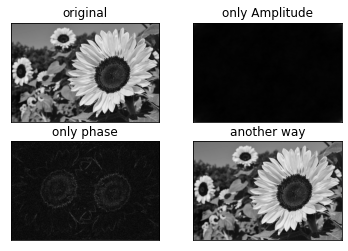

In [ ]:
# Inverse transform only using magnitude or phase part
img = cv2.imread('flower.jpg', 0) 
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
s1 = np.log(np.abs(fshift))
plt.subplot(221), plt.imshow(img,'gray'), plt.title('original')
plt.xticks([]),plt.yticks([])

# Inverse transform, abs to get magnitude
f1shift = np.fft.ifftshift(np.abs(fshift))
img_back = np.fft.ifft2(f1shift)

img_back = np.abs(img_back)
img_back = (img_back-np.amin(img_back))/(np.amax(img_back)-np.amin(img_back))
plt.subplot(222),plt.imshow(img_back,'gray'),plt.title('only Amplitude')
plt.xticks([]),plt.yticks([])

# Inverse transform using phase
f2shift = np.fft.ifftshift(np.angle(fshift))
img_back = np.fft.ifft2(f2shift)
# Complex number, cannot show up
img_back = np.abs(img_back)
# Adjust the range
img_back = (img_back-np.amin(img_back))/(np.amax(img_back)-np.amin(img_back))
plt.subplot(223),plt.imshow(img_back,'gray'),plt.title('only phase')
plt.xticks([]),plt.yticks([])

# Inverse 
s1 = np.abs(fshift) # using the magnitude
s1_angle = np.angle(fshift) # using the phase
s1_real = s1*np.cos(s1_angle) # get the real part
s1_imag = s1*np.sin(s1_angle) # get the imaginary part
s2 = np.zeros(img.shape, dtype=complex) 
s2.real = np.array(s1_real) 
s2.imag = np.array(s1_imag)

f2shift = np.fft.ifftshift(s2) 
img_back = np.fft.ifft2(f2shift)
img_back = np.abs(img_back)
img_back = (img_back-np.amin(img_back))/(np.amax(img_back)-np.amin(img_back))
plt.subplot(224),plt.imshow(img_back,'gray'),plt.title('another way')
plt.xticks([]),plt.yticks([])


TypeError: ignored

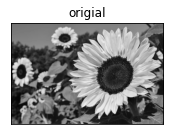

In [ ]:
img_man = cv2.imread('flower.jpg', 0) 
plt.subplot(121),plt.imshow(img_man,'gray'),plt.title('origial')
plt.xticks([]),plt.yticks([])
#--------------------------------
rows,cols = img_man.shape
mask = np.ones(img_man.shape,np.uint8)
mask[rows/2-4:rows/2+4,cols/2-4:cols/2+4] = 0
#--------------------------------
f1 = np.fft.fft2(img_man)
f1shift = np.fft.fftshift(f1)
f1shift = f1shift*mask
f2shift = np.fft.ifftshift(f1shift) #对新的进行逆变换
img_new = np.fft.ifft2(f2shift)
#出来的是复数，无法显示
img_new = np.abs(img_new)
#调整大小范围便于显示
img_new = (img_new-np.amin(img_new))/(np.amax(img_new)-np.amin(img_new))
plt.subplot(122),plt.imshow(img_new,'gray'),plt.title('Highpass')
plt.xticks([]),plt.yticks([])


(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

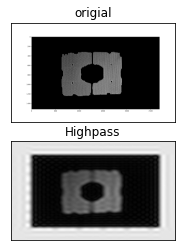

In [ ]:
img_man = cv2.imread('1.png', 0) #直接读为灰度图像
# f, axs = plt.subplots(2, 1, figsize=(100,100))
plt.subplot(211),plt.imshow(img_man,'gray'),plt.title('origial')
plt.xticks([]),plt.yticks([])
#--------------------------------
rows,cols = img_man.shape
mask = np.zeros(img_man.shape,np.uint8)
mask[int(rows/2-20):int(rows/2+20),int(cols/2-20):int(cols/2+20)] = 1
#--------------------------------
f1 = np.fft.fft2(img_man)
f1shift = np.fft.fftshift(f1)
f1shift = f1shift*mask
f2shift = np.fft.ifftshift(f1shift) #对新的进行逆变换
img_new = np.fft.ifft2(f2shift)
#出来的是复数，无法显示
img_new = np.abs(img_new)
#调整大小范围便于显示
img_new = (img_new-np.amin(img_new))/(np.amax(img_new)-np.amin(img_new))
plt.subplot(212),plt.imshow(img_new,'gray'),plt.title('Highpass')
plt.xticks([]),plt.yticks([])


(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

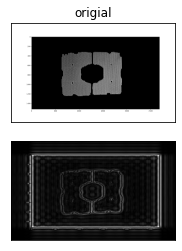

In [ ]:
img_man = cv2.imread('1.png',0) #直接读为灰度图像
# f, axs = plt.subplots(2, 1, figsize=(100,100))
plt.subplot(211),plt.imshow(img_man,'gray'),plt.title('origial')
plt.xticks([]),plt.yticks([])
#--------------------------------
para1 = 15
para2 = 60
rows,cols = img_man.shape
mask1 = np.ones(img_man.shape,np.uint8)
mask1[rows//2-para1:rows//2+para1,cols//2-para1:cols//2+para1] = 0
mask2 = np.zeros(img_man.shape,np.uint8)
mask2[rows//2-para2:rows//2+para2,cols//2-para2:cols//2+para2] = 1
mask = mask1*mask2
#--------------------------------
f1 = np.fft.fft2(img_man)
f1shift = np.fft.fftshift(f1)
f1shift = f1shift*mask
f2shift = np.fft.ifftshift(f1shift) #对新的进行逆变换
img_new = np.fft.ifft2(f2shift)
#出来的是复数，无法显示
img_new = np.abs(img_new)
#调整大小范围便于显示
img_new = (img_new-np.amin(img_new))/(np.amax(img_new)-np.amin(img_new))
plt.subplot(212),plt.imshow(img_new,'gray')
plt.xticks([]),plt.yticks([])

Rotation: 90.00 degrees


/usr/local/lib/python3.6/dist-packages/skimage/transform/radon_transform.py:91: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


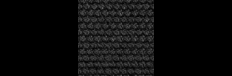

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from skimage.transform import radon


filename = '4.png'
# Load file, converting to grayscale
img = cv2.imread(filename)
I = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
h, w = I.shape
# If the resolution is high, resize the image to reduce processing time.
if (w > 640):
    I = cv2.resize(I, (640, int((h / w) * 640)))
I = I - np.mean(I)  # Demean; make the brightness extend above and below zero
# Do the radon transform
sinogram = radon(I)
# Find the RMS value of each row and find "busiest" rotation,
# where the transform is lined up perfectly with the alternating dark
# text and white lines
r = np.array([np.sqrt(np.mean(np.abs(line) ** 2)) for line in sinogram.transpose()])
rotation = np.argmax(r)
print('Rotation: {:.2f} degrees'.format(90 - rotation))

# Rotate and save with the original resolution
M = cv2.getRotationMatrix2D((w/2, h/2), 90 - rotation, 1)
dst = cv2.warpAffine(img, M, (w, h))
cv2.imwrite('rotated.jpg', dst)
cv2_imshow(dst)

REF: https://blog.csdn.net/on2way/article/details/46981825
